In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('usd_kzt.csv')
df

,Date,USD_quant,USD
0,2015-03-30,1,185.50
1,2015-03-31,1,185.65
2,2015-04-01,1,185.65
3,2015-04-02,1,185.65
4,2015-04-03,1,185.65
...,...,...,...
1823,2020-03-26,1,444.80
1824,2020-03-27,1,446.06
1825,2020-03-28,1,445.84
1826,2020-03-29,1,445.84


2 столбец нам не нужен, от него можно избавиться

In [45]:
df = df[['Date', 'USD']]
N = df.shape[0]
tau = (N + 1) // 4
n = N - tau + 1
Tenge = df['USD'].values
X = np.array([Tenge[ind : ind + tau] for ind in range(0, n)]).T
print("matrix size =", X.shape, tau, n)
C = X.dot(X.T) / n
eigen_val, V = np.linalg.eig(C)
Y = V.T.dot(X)
r = tau // 10
_X = V[:, :r].dot(Y[:r])

matrix size = (457, 1372) 457 1372


In [46]:
def calc_sum(arr, first, second, m):
    acc = 0.0
    for i in range(m):
        acc += arr[first + i, second - i]
    return acc

tenge = np.zeros(N)
for s in range(1 , N + 1):
    if 1 <= s <= tau:
        tenge[s - 1] = calc_sum(_X, 0, s - 1, s) / s 
    elif tau <= s <= n:
        tenge[s - 1] = calc_sum(_X, 0, s - 1,tau) / tau
    else:
        tenge[s - 1] = calc_sum(_X, s - n, n - 1, N - s + 1) / (N - s + 1)

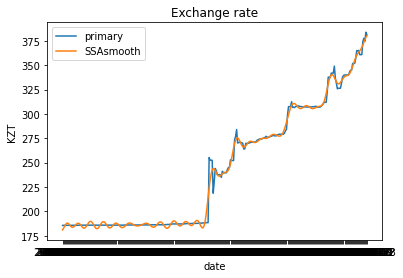

In [47]:
plt.plot(df['Date'][:300], Tenge[:300], label = 'primary')
plt.plot(df['Date'][:300], tenge[:300], label = 'SSAsmooth')
plt.xlabel('date')
plt.ylabel('KZT')
plt.title('Exchange rate')
plt.legend()

In [48]:
def SSApredict(N, tau, r, X, V):
    _V = V[:tau - 1, :r]
    Q = np.array([X[i] for i in range(N - tau + 1, N)])
    V_tau = V[tau - 1, :r]
    return V_tau.dot(_V.T).dot(Q) / (1.0 - V_tau.dot(V_tau.T))

for i in range(50):
    val = SSApredict(N + i, tau, r, Tenge, V)
    Tenge = np.append(Tenge, [val])


Text(0.5, 1.0, 'Exchange rate')

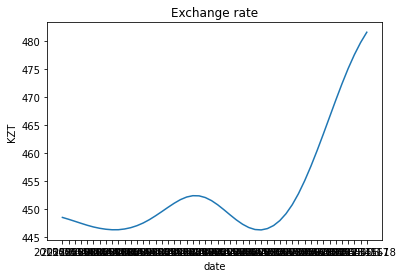

In [49]:
plt.plot(df['Date'][:50], Tenge[-50:])
plt.xlabel('date')
plt.ylabel('KZT')
plt.title('Exchange rate')

Было проведен прогноз курс доллара к тенге методом SSA на 50 дней(31 марта 2020 до 19 мая). К несчатью нас ждет доллар за 480 тенге. 